In [2]:
import pandas as pd
import json

In [79]:
zap_apartamentos_api_dump = json.load(open('zap_apartamentos_api_dump.json'))

In [80]:
len(zap_apartamentos_api_dump)

4197

In [81]:
data_raw = pd.json_normalize(zap_apartamentos_api_dump)

In [82]:
data = pd.DataFrame()

In [83]:
data_raw.head(10)#['usableAreas'].str.get(0)

,medias,listing.displayAddressType,listing.amenities,listing.usableAreas,listing.constructionStatus,listing.listingType,listing.description,listing.title,listing.stamps,listing.createdAt,...,link.data.state,link.data.city,link.data.zone,link.data.neighborhood,link.data.street,link.data.streetNumber,link.name,link.href,link.rel,account.logoUrl
0,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[GYM, BARBECUE_GRILL, CINEMA, GOURMET_SPACE, G...",[112],ConstructionStatus_NONE,USED,O apartamento no bairro Fátima com 112 metros ...,"Apto 112m2, 3 quartos, bairro de Fátima, lazer...",[],2021-06-07T20:08:31.103Z,...,Ceará,Fortaleza,Bairros,Fátima,Rua Dom Sebastião Leme,655,Fátima,/imovel/aluguel-apartamento-3-quartos-com-pisc...,,NaN
1,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[ELEVATOR, GOURMET_SPACE, POOL, GYM, SPORTS_CO...",[75],ConstructionStatus_NONE,USED,"Locação: Excelente apartamento no Cocó, Cond J...","Locação: Excelente apartamento no Cocó, Cond J...",[],2021-06-14T14:54:43.515Z,...,Ceará,Fortaleza,Bairros,Cocó,Rua Bento Albuquerque,1133,Cocó,/imovel/aluguel-apartamento-2-quartos-com-pisc...,,https://resizedimgs.zapimoveis.com.br/{action}...
2,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[ELEVATOR, POOL, GYM, ADULT_GAME_ROOM, SAUNA, ...",[60],ConstructionStatus_NONE,USED,O apartamento está localizado no bairro De Lou...,Apartamento para aluguel possui 60 metros quad...,[],2021-05-14T18:19:20.436Z,...,Ceará,Fortaleza,Bairros,De Lourdes,Avenida Engenheiro Luiz Vieira,800,De Lourdes,/imovel/aluguel-apartamento-2-quartos-com-pisc...,,NaN
3,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[AMERICAN_KITCHEN, AIR_CONDITIONING, GYM, PART...",[91],ConstructionStatus_NONE,USED,O apartamento no bairro Aldeota com 91 metros ...,Apartamento para aluguel tem 91 metros quadrad...,[],2021-06-24T16:32:09.403Z,...,Ceará,Fortaleza,Bairros,Aldeota,Rua Nunes Valente,1001,Aldeota,/imovel/aluguel-apartamento-3-quartos-com-chur...,,NaN
4,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[GATED_COMMUNITY, ELEVATOR, INTERCOM, ALARM_SY...",[70],ConstructionStatus_NONE,USED,"Apartamento com 03 quartos sendo 02 suítes, 01...","Apartamento com 3 dormitórios para alugar, 70 ...",[],2021-06-05T03:20:40.383Z,...,Ceará,Fortaleza,Bairros,José Bonifácio,Rua Major Facundo,2140,José Bonifácio,/imovel/aluguel-apartamento-3-quartos-jose-bon...,,https://resizedimgs.zapimoveis.com.br/{action}...
5,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,[],[70],ConstructionStatus_NONE,USED,"Apartamento primeira locação , guarita, 03 qua...","Apartamento primeira locação , guarita, 03 qua...",[],2021-06-22T00:14:03.037Z,...,Ceará,Fortaleza,Bairros,Praia de Iracema,Rua Gonçalves Ledo,387,Praia de Iracema,/imovel/aluguel-apartamento-3-quartos-praia-de...,,https://resizedimgs.zapimoveis.com.br/{action}...
6,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[GYM, PLAYGROUND, SPORTS_COURT, PARTY_HALL, GA...",[75],ConstructionStatus_NONE,USED,O apartamento no bairro Meireles com 75 metros...,"Apartamento Decorado com 02 Quartos, 72m² - Me...",[],2020-07-23T17:34:31.935Z,...,Ceará,Fortaleza,Bairros,Meireles,Rua Antônio Augusto,483,Meireles,/imovel/aluguel-apartamento-2-quartos-mobiliad...,,https://resizedimgs.zapimoveis.com.br/{action}...
7,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[GYM, POOL, SPORTS_COURT, PLAYGROUND, PARTY_HA...",[86],ConstructionStatus_NONE,USED,Adriano Freire Imóveis aluga apartamento no Ic...,"Apartamento todo projetado, 3 quartos, no bair...",[],2021-06-22T20:09:49.566Z,...,Ceará,Fortaleza,Bairros,Fátima,Avenida dos Expedicionários,3260,Fátima,/imovel/aluguel-apartamento-3-quartos-com-pisc...,,https://resizedimgs.zapimoveis.com.br/{action}...
8,[{'url': 'https://resizedimgs.zapimoveis.com.b...,ALL,"[SECURITY_CAMERA, SAFETY_CIRCUIT, ENTRANCE_HAL...",[72],ConstructionStatus_NONE,USED,Praticidade e conforto são fundamentais na hor...,"Apartamento, Aldeota, 3 Quartos",[],2021-06-15T19:44:14.205Z,...,

In [84]:
data['area_util'] = data_raw['listing.usableAreas'].str.get(0)
data['data_de_criacao'] = data_raw['listing.createdAt']
data['ultima_atualizacao'] = data_raw['listing.updatedAt']
data['andares'] = data_raw['listing.floors'].str.get(0)
data['id'] = data_raw['listing.id']
data['vagas_estacionamento'] = data_raw['listing.parkingSpaces'].str.get(0)
data['suites'] = data_raw['listing.suites'].str.get(0)
data['banheiros'] = data_raw['listing.bathrooms'].str.get(0)
data['quartos'] = data_raw['listing.bedrooms'].str.get(0)
data['iptu_anual'] = data_raw['listing.pricingInfos'].str.get(0).str.get('yearlyIptu')
data['condominio'] = data_raw['listing.pricingInfos'].str.get(0).str.get('monthlyCondoFee')
data['aluguel_mensal_total'] = data_raw['listing.pricingInfos'].str.get(0).str.get('rentalInfo').str.get('monthlyRentalTotalPrice')
data['cep'] = data_raw['listing.address.zipCode']
data['longitude'] = data_raw['listing.address.point.lon']
data['latitude'] = data_raw['listing.address.point.lat']


In [85]:
data['id'].value_counts().value_counts()

21    177
20      5
10      2
2       2
3       2
4       2
5       2
6       2
7       2
8       2
9       2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
19      2
1       2
Name: id, dtype: int64

In [86]:
data = data.drop_duplicates('id')

In [89]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='area_util', ylabel='aluguel_mensal_total'>

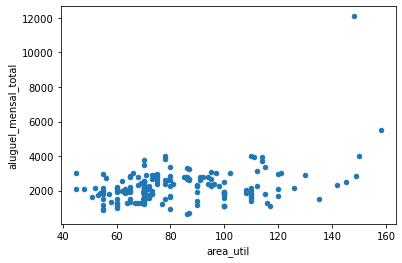

In [96]:
data[['area_util','aluguel_mensal_total']].astype(float).plot(kind='scatter',x='area_util',y='aluguel_mensal_total')

In [101]:
data.to_csv('zap_imoveis.csv',index=False)

In [103]:
data.latitude

0      -3.747443
1      -3.744913
2      -3.734086
3      -3.733730
4      -3.741520
          ...   
3396         NaN
3596   -3.734020
3796         NaN
3996   -3.735390
4196   -3.738517
Name: latitude, Length: 220, dtype: float64